In [1]:
from gen_model2 import gen_model, load_data

# Grafo de urls

In [2]:
from collections import defaultdict, Counter
from tqdm import tqdm_notebook as tqdm

def url_graph(dataset_name):
    event_data, missing_urls_amount = load_data(dataset_name)

    adj_list = defaultdict(lambda: Counter())

    for tweet_id, tweet in tqdm(event_data.items(), total=len(event_data)):
        if not tweet.expanded_urls:
            continue
        for url_u in tweet.expanded_urls.values():
            for url_v in tweet.expanded_urls.values():
                if url_u != url_v and url_u and url_v:
                    adj_list[url_u][url_v] += 1

    return adj_list

g = url_graph('libya_hotel_tweets.tsv')

In [18]:
nodes = dict()
edges = list()

for u, v_data in g.items():
    nodes[u] = hash(u)
    for v, cnt in v_data.items():
        nodes[v] = hash(v)
        edges.append((hash(u), hash(v), cnt))

with open(f'data_exploration/url_nodes_libya.csv', 'w') as f:
    f.write('Id;Label\n')
    for url, node_id in nodes.items():
        f.write(f'{node_id};"{url}"\n')
        
with open(f'data_exploration/url_edges_libya.csv', 'w') as f:
    f.write('Source;Target;Weight;Type\n')
    for u, v, w in edges:
        f.write(f'{u};{v};{w};Undirected\n')

In [19]:
g = url_graph('oscar_pistorius_tweets.tsv')
nodes = dict()
edges = list()

for u, v_data in g.items():
    nodes[u] = hash(u)
    for v, cnt in v_data.items():
        nodes[v] = hash(v)
        edges.append((hash(u), hash(v), cnt))

with open(f'data_exploration/url_nodes_pistorius.csv', 'w') as f:
    f.write('Id;Label\n')
    for url, node_id in nodes.items():
        f.write(f'{node_id};"{url}"\n')
        
with open(f'data_exploration/url_edges_pistorius.csv', 'w') as f:
    f.write('Source;Target;Weight;Type\n')
    for u, v, w in edges:
        f.write(f'{u};{v};{w};Undirected\n')

In [20]:
g = url_graph('nepal_tweets.tsv')
nodes = dict()
edges = list()

for u, v_data in g.items():
    nodes[u] = hash(u)
    for v, cnt in v_data.items():
        nodes[v] = hash(v)
        edges.append((hash(u), hash(v), cnt))

with open(f'data_exploration/url_nodes_nepal.csv', 'w') as f:
    f.write('Id;Label\n')
    for url, node_id in nodes.items():
        f.write(f'{node_id};"{url}"\n')
        
with open(f'data_exploration/url_edges_nepal.csv', 'w') as f:
    f.write('Source;Target;Weight;Type\n')
    for u, v, w in edges:
        f.write(f'{u};{v};{w};Undirected\n')

# Cluster 7 libya model url graph

In [31]:
def url_graph_subset(dataset_name, tweet_ids):
    event_data, missing_urls_amount = load_data(dataset_name)
    tmp = dict()
    for t in tweet_ids:
        tmp[t] = event_data[t]
    event_data = tmp

    adj_list = defaultdict(lambda: Counter())

    for tweet_id, tweet in tqdm(event_data.items(), total=len(event_data)):
        if not tweet.expanded_urls:
            continue
        for url_u in tweet.expanded_urls.values():
            for url_v in tweet.expanded_urls.values():
                if url_u != url_v and url_u and url_v:
                    adj_list[url_u][url_v] += 1

    return adj_list

In [29]:
tweet_ids = []

with open('data_exploration/libya_model_cluster_1_tweet_ids.txt') as f:
    next(f)
    for line in f:
        tweet_ids.append(line[:-1])

g = url_graph_subset('libya_hotel_tweets.tsv', tweet_ids)


nodes = dict()
edges = list()

for u, v_data in g.items():
    nodes[u] = hash(u)
    for v, cnt in v_data.items():
        nodes[v] = hash(v)
        edges.append((hash(u), hash(v), cnt))

with open(f'data_exploration/url_nodes_libya_cluster_1.csv', 'w') as f:
    f.write('Id;Label\n')
    for url, node_id in nodes.items():
        f.write(f'{node_id};"{url}"\n')
        
with open(f'data_exploration/url_edges_libya_cluster_1.csv', 'w') as f:
    f.write('Source;Target;Weight;Type\n')
    for u, v, w in edges:
        f.write(f'{u};{v};{w};Undirected\n')


In [32]:
for i in tqdm([1,2,3,4,5,6,7,9,10]):
    tweet_ids = []

    with open(f'data_exploration/nepal_model_cluster_{i}_tweet_ids.txt') as f:
        next(f)
        for line in f:
            tweet_ids.append(line[:-1])

    g = url_graph_subset('nepal_tweets.tsv', tweet_ids)

    nodes = dict()
    edges = list()

    for u, v_data in g.items():
        nodes[u] = hash(u)
        for v, cnt in v_data.items():
            nodes[v] = hash(v)
            edges.append((hash(u), hash(v), cnt))

    with open(f'data_exploration/url_nodes_nepal_cluster_{i}.csv', 'w') as f:
        f.write('Id;Label\n')
        for url, node_id in nodes.items():
            f.write(f'{node_id};"{url}"\n')

    with open(f'data_exploration/url_edges_nepal_cluster_{i}.csv', 'w') as f:
        f.write('Source;Target;Weight;Type\n')
        for u, v, w in edges:
            f.write(f'{u};{v};{w};Undirected\n')


In [35]:
event_data, _ = load_data('oscar_pistorius_tweets.tsv')

In [40]:
for t, d in event_data.items():
    for _, u in d.expanded_urls.items():
        if u == 'http://www.nbcnews.com/':
            print(d.text)

Graphic Pistorius Case Evidence Banned from Twitter - http://t.co/RtgqFy29hH.. http://t.co/ai43eSCXXz #broadway
Judge Bans 'Graphic' Pistorius Case Testimony from Twitter, TV (http://t.co/vgPNk8t9PW) http://t.co/r66W2K91Sh
Pistorius Murder Trial Shown Blood-Stained Prosthetic Legs (http://t.co/vgPNk8t9PW) http://t.co/AyexDZJXLL
'Bizarre' Decision Delays Oscar #Pistorius' Murder Trial - http://t.co/52wYsCn80u http://t.co/NehUl4Hh0h #oscartrial
#TopNews Oscar Pistorius at Murder Trial: 'I Was Besotted' With Reeva - http://t.co/czkGi8ygP9 http://t.co/EpGK6sil6B
Pistorius To Reeva: 'I'm The Luckiest Guy Ever' - http://t.co/AXJUNk5J0W http://t.co/OUy84LBjat
Pistorius To Reeva: 'I'm The Luckiest Guy Ever' - http://t.co/YXuIyCfRqp http://t.co/KDfXAvZr4v
Oscar Pistorius Murder Trial Hears of Night Reeva Was Killed - http://t.co/YXuIyCfRqp http://t.co/9sKuMVh6Yr
Pistorius: Reeva Made Dinner On Night I Killed Her - http://t.co/O2h0pFO5Kt: South African Broadcasting Corpora... http://t.co/9wzrBXh

# Generar modelos para cada evento

In [3]:
models = {
    'libya': gen_model('libya_hotel_tweets.tsv'),
    'pistorius': gen_model('oscar_pistorius_tweets.tsv'),
    'nepal': gen_model('nepal_tweets.tsv')
}

100%|██████████| 503660/503660 [00:00<00:00, 758978.62it/s]


# Tamaños de componentes y cantidad de URLs

In [63]:
from collections import defaultdict

url_index = defaultdict(lambda: defaultdict(list))
components = defaultdict(lambda: defaultdict(list))

for event, info in models.items():
    for component in info['components']:
        key = []
        value = []
        for element in component:
            if element.startswith('http'):
                key.append(element)
            else:
                tweet_id = element.split('_')[0]
                tweet = info['event_data'][tweet_id]
                value.append(tweet.tweet_id)
        if not key:
            key = [tweet.tweet_id]
            
        hash_key = hash(tuple(key))
        url_index[event][hash_key] = tuple(key)
        components[event][hash_key] = value

In [64]:
max_urls = dict()

for event, comp in components.items():
    m = 0
    h = 0
    
    for hash_key, tweet_ids in comp.items():
        urls = url_index[event][hash_key]
        if len(urls) > m:
            m = len(urls)
            h = hash_key
            
    max_urls[event] = h
    
    print(event)
    print("=" * 20)
    print("tweets:", len(models[event]['event_data']))
    print("components:", len(models[event]['components']))
    print("largest component sizes:", sorted([len(x) for x in models[event]['components']], reverse=True)[:15])
    print("greatest amount of urls in any component:", m)
    print()

libya
tweets: 26331
components: 3399
largest component sizes: [1802, 1058, 746, 653, 415, 398, 385, 237, 236, 187, 186, 148, 145, 140, 125]
greatest amount of urls in any component: 10

pistorius
tweets: 112260
components: 9641
largest component sizes: [2674, 1003, 873, 766, 748, 720, 692, 619, 490, 464, 423, 408, 405, 405, 399]
greatest amount of urls in any component: 3

nepal
tweets: 503660
components: 22915
largest component sizes: [55309, 45063, 12120, 4439, 3885, 3161, 3067, 2640, 2607, 2482, 2304, 2299, 2246, 2170, 2138]
greatest amount of urls in any component: 46



# Gen vectors (model)

In [134]:
import spacy
from gensim.models import KeyedVectors

nlp = spacy.load('en', disable=["tagger", "parser", "ner"])
we = KeyedVectors.load_word2vec_format('/home/mquezada/anchor-text-twitter/data/ft_alltweets_model.vec')

In [163]:
from tqdm import tqdm_notebook as tqdm
from numpy.linalg import norm

vectors = dict()

for event, comp in tqdm(components.items()):
    vectors[event] = dict()
    
    for key, tweet_ids in tqdm(comp.items()):
        vec = np.zeros(100)
        for tweet_id in tweet_ids:
            tweet = models[event]['event_data'][tweet_id]
            text = tweet.text
            for word in [token.lower_ for token in nlp(text) if token.lower_ in we]:
                vec += we[word]
        vec = vec / norm(vec)
        vectors[event][key] = vec

/home/mquezada/anaconda3/envs/news-model/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [164]:
vectors['libya'][list(vectors['libya'].keys())[1]]

array([ 0.02824225, -0.04819198,  0.09099605, -0.04282068,  0.08411294,
       -0.01181907, -0.10118419, -0.18535867,  0.14068391,  0.07276644,
        0.05486462, -0.02530425,  0.01852417,  0.09298686,  0.12845652,
        0.1269716 ,  0.04025012,  0.02436369, -0.07346373,  0.12511754,
        0.08789154,  0.10809686, -0.08620558, -0.03800771, -0.03070271,
        0.14631607, -0.12935321,  0.06226652, -0.11367712,  0.08689723,
       -0.05497215,  0.19838188, -0.14424345,  0.06313043, -0.14838853,
       -0.05787362, -0.06099151,  0.0034573 ,  0.09745442, -0.15208666,
        0.0561565 ,  0.02260357, -0.07828806,  0.01789875, -0.08244725,
        0.08319958, -0.04638927, -0.03046983, -0.0057817 ,  0.03925547,
       -0.01676722,  0.03366156,  0.18768177,  0.13551884,  0.13051724,
        0.06885202,  0.09735954, -0.09844771,  0.12467296, -0.07162147,
       -0.0284972 ,  0.03718158, -0.06984176,  0.13768083,  0.11884792,
       -0.07425329, -0.11236573, -0.14860732,  0.04523326, -0.00

# Gen vectors (raw)

In [168]:
vectors_raw = dict()

for event, info in tqdm(models.items()):
    vectors_raw[event] = dict()
    event_data = info['event_data']

    for tweet_id, tweet in tqdm(event_data.items()):
        text = tweet.text
        tweet_vec = np.zeros(100)
        for word in [token.lower_ for token in nlp(text) if token.lower_ in we]:
            tweet_vec += we[word]
            
        tweet_vec = tweet_vec / norm(tweet_vec)
        vectors_raw[event][tweet_id] = tweet_vec

/home/mquezada/anaconda3/envs/news-model/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [11]:
models['libya']['event_data']['560029549866811393']

Tweet(tweet_id='560029549866811393', retweet_id='560027393432502272', quote_id='NULL', reply_id='NULL', short_urls=['http://t.co/5TK7TsFd6P', 'http://t.co/jszG3p'], expanded_urls={0: 'https://www.rt.com/news/226603-libya-tripoli-gunmen-seige/', 1: None}, text='#CorinthiaHotel: Suicide bombers &amp; 5 masked gunmen attack hotel, hostages on top floor  http://t.co/5TK7TsFd6P #Lybia http://t.co/jszG3p', created_at='2015-01-27 11:00:24')

# Save data

In [169]:
with open(f'data_exploration/model_orig_components.tsv', 'w') as f:
    for event, component in tqdm(components.items()):
        for key, tweet_ids in component.items():
            for tweet_id in tweet_ids:
                f.write(f'{event}\t{key}\t{tweet_id}\n')
            
            
with open(f'data_exploration/model_orig_urlindex.tsv', 'w') as f:
    for event, url_data in tqdm(url_index.items()):
        for key, urls in url_data.items():
            for url in urls:
                f.write(f'{event}\t{key}\t{url}\n')
            
            
with open(f'data_exploration/model_orig_data.tsv', 'w') as f:
    for event, info in tqdm(models.items()):
        for tweet_id, tweet in info['event_data'].items():
            text = tweet.text
            text = text.replace('"', "'")
            text = text.split()
            text = ' '.join(text)
            text = f'"{text}"'
            
            rt_id = tweet.retweet_id
            rp_id = tweet.reply_id
            
            f.write(f'{event}\t{tweet_id}\t{rt_id}\t{rp_id}\t{text}\n')
            
            
with open(f'data_exploration/model_orig_vectors.tsv', 'w') as f:
    for event, vecs in tqdm(vectors.items()):
        for key, vec in vecs.items():
            vec_str = '\t'.join(str(val) for val in vec)
            f.write(f'{event}\t{key}\t{vec_str}\n')
                
                
with open(f'data_exploration/raw_vectors.tsv', 'w') as f:
    for event, vecs in tqdm(vectors_raw.items()):
        for tweet_id, vec in vecs.items():
            vec_str = '\t'.join(str(val) for val in vec)
            f.write(f'{event}\t{tweet_id}\t{vec_str}\n')

In [166]:
vec

array([ 0.11043121, -0.08482812,  0.07795946, -0.02413196,  0.06910534,
        0.00599392, -0.12493993, -0.14355456,  0.21563682,  0.13811442,
       -0.02548832,  0.02814014, -0.0482075 ,  0.04765366,  0.18212018,
        0.08994566,  0.0815139 , -0.00224837, -0.03025333,  0.17004545,
        0.05835887,  0.0106208 , -0.06171078, -0.03750832, -0.10941179,
        0.08753613, -0.18715044,  0.04483118, -0.12153643,  0.05315808,
        0.01343694,  0.09029873, -0.16848046,  0.04481692, -0.2164297 ,
        0.04585125, -0.0869918 ,  0.02272633, -0.00326092, -0.07996745,
        0.06305606,  0.01456426, -0.09662235,  0.00533938, -0.12314915,
        0.03813341, -0.02284748, -0.07256159, -0.04770311,  0.10574049,
       -0.04172214,  0.06608655,  0.16439364,  0.15772197,  0.15262508,
        0.09641186,  0.1156585 , -0.13303776,  0.07657688, -0.12303727,
       -0.00156617, -0.05028406, -0.08030836,  0.15507677,  0.08092368,
       -0.01289935, -0.1125555 , -0.10983721,  0.05219864,  0.05

# Conteo de URLs y tamaños de componentes

In [21]:
import numpy as np

libya_comp_sizes = np.array(sorted([len(x) for x in models['libya']['components']], reverse=True))
libya_url_sizes = np.array([len(url_index['libya'][key]) for key in components['libya'].keys()])

pistorius_comp_sizes = np.array(sorted([len(x) for x in models['pistorius']['components']], reverse=True))
pistorius_url_sizes = np.array([len(url_index['pistorius'][key]) for key in components['pistorius'].keys()])

nepal_comp_sizes = np.array(sorted([len(x) for x in models['nepal']['components']], reverse=True))
nepal_url_sizes = np.array([len(url_index['nepal'][key]) for key in components['nepal'].keys()])

NameError: name 'models' is not defined

## Tamaños de componentes y cantidad de URLs por componente

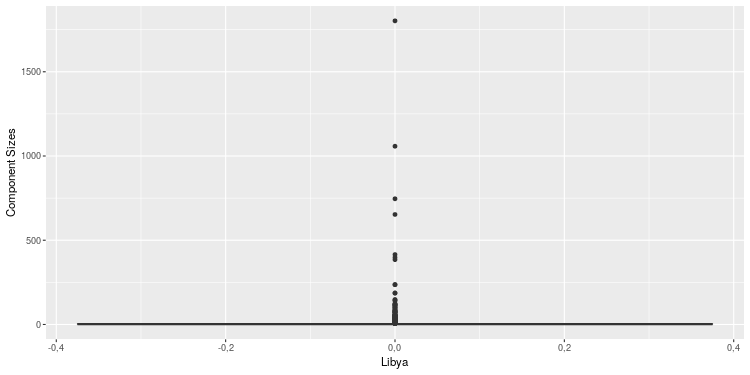

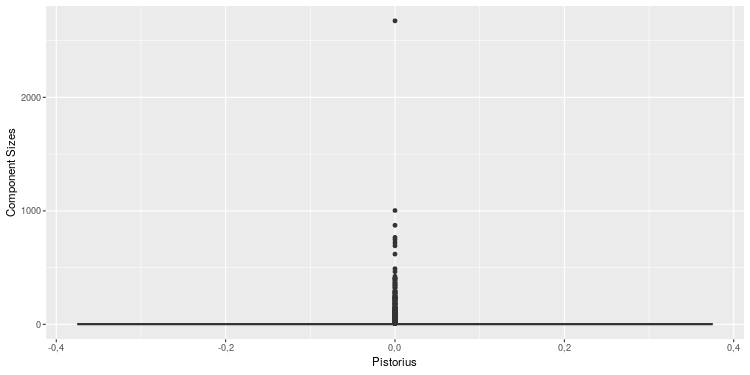

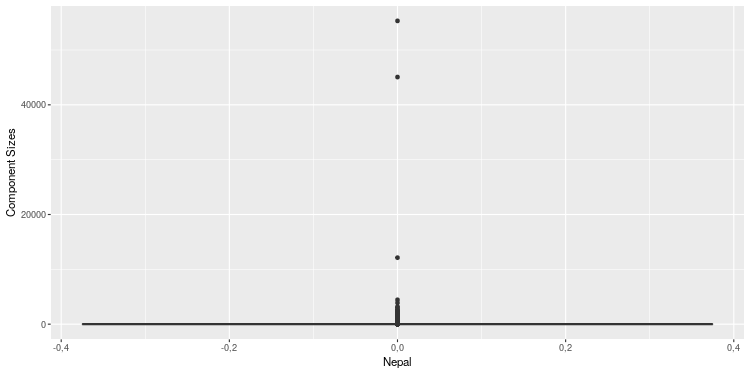

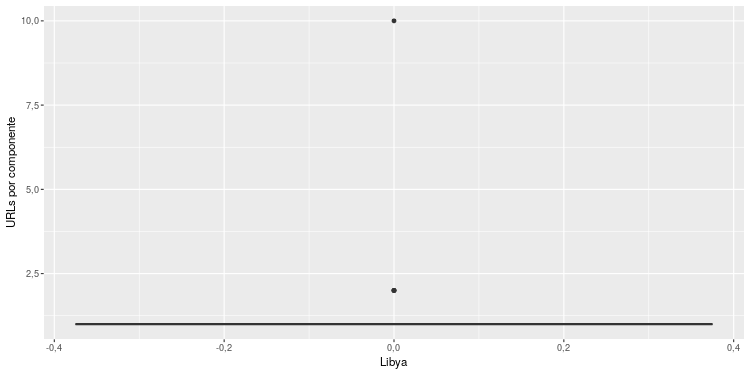

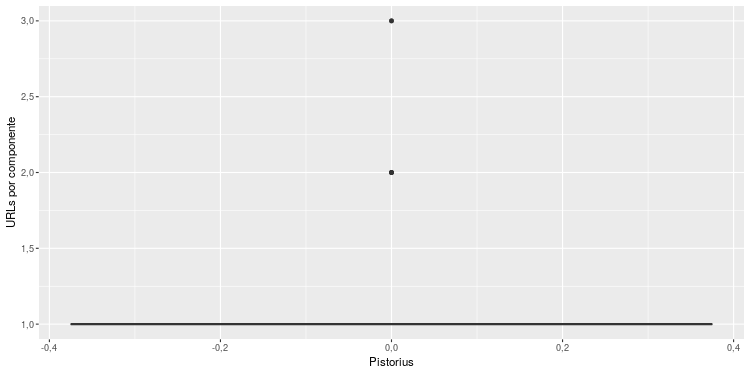

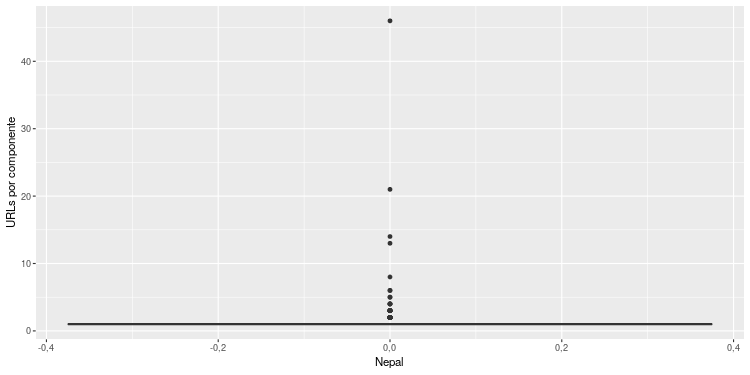

In [127]:
%%R -i libya_comp_sizes -i libya_url_sizes -i pistorius_comp_sizes -i pistorius_url_sizes -i nepal_comp_sizes -i nepal_url_sizes -w 10 -h 5 --units in -r 75

# TODO: usar una mejor forma de visualizar este tipo de distribuciones

library(tidyverse)

print(ggplot(tibble(libya_comp_sizes)) + geom_boxplot(aes(y=libya_comp_sizes), binwidth=10) + labs(x='Libya', y='Component Sizes')) 
print(ggplot(tibble(pistorius_comp_sizes)) + geom_boxplot(aes(y=pistorius_comp_sizes), binwidth=10) + labs(x='Pistorius', y='Component Sizes'))
print(ggplot(tibble(nepal_comp_sizes)) + geom_boxplot(aes(y=nepal_comp_sizes), binwidth=10) + labs(x='Nepal', y='Component Sizes'))


print(ggplot(tibble(libya_url_sizes)) + geom_boxplot(aes(y=libya_url_sizes), binwidth=10) + labs(x='Libya', y='URLs por componente')) 
print(ggplot(tibble(pistorius_url_sizes)) + geom_boxplot(aes(y=pistorius_url_sizes), binwidth=10) + labs(x='Pistorius', y='URLs por componente'))
print(ggplot(tibble(nepal_url_sizes)) + geom_boxplot(aes(y=nepal_url_sizes), binwidth=10) + labs(x='Nepal', y='URLs por componente'))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
